## Assignment 3: Machine Learning
## Tiankang Xie

## P1

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import io
import requests
import math
from scipy import stats
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

In [2]:
df_train = pd.read_csv("F:\\SP2019\\Machine_learning\\HW3\\hw3_labeled_data.csv")
df_test = pd.read_csv("F:\\SP2019\\Machine_learning\\HW3\\hw3_unlabeled_data.csv")

# 1.a

In [3]:
print(df_train.shape)
display(df_train.head())
print(df_train.describe().transpose())
list(df_train.columns) 

(300, 26)


,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,patient_0,56,80,1.010,1,0,1,1,0,0,...,40,11800,5.0,1,1,0,0,1,0,1
1,patient_1,70,70,1.010,1,0,1,0,1,1,...,27,9600,3.4,0,1,0,0,0,0,1
2,patient_2,76,70,1.015,1,0,1,1,0,0,...,32,9600,3.7,1,0,0,1,0,0,1
3,patient_3,51,60,1.025,0,0,1,1,0,0,...,49,8300,5.2,0,0,0,1,0,0,0
4,patient_4,58,70,1.025,0,0,1,1,0,0,...,53,9100,5.2,0,0,0,1,0,0,0


                count         mean          std       min       25%      50%  \
age             300.0    50.990000    17.339514     2.000    41.000    54.00   
bp              300.0    76.433333    13.121973    50.000    70.000    80.00   
sg              300.0     1.017233     0.005697     1.005     1.010     1.02   
al              300.0     0.993333     1.300870     0.000     0.000     0.00   
su              300.0     0.450000     1.085400     0.000     0.000     0.00   
rbc             300.0     0.706667     0.456051     0.000     0.000     1.00   
pc              300.0     0.776667     0.417176     0.000     1.000     1.00   
pcc             300.0     0.103333     0.304902     0.000     0.000     0.00   
ba              300.0     0.050000     0.218309     0.000     0.000     0.00   
bgr             300.0   147.133333    80.246207    22.000    99.000   120.00   
bu              300.0    54.337000    44.402550     1.500    26.750    40.50   
sc              300.0     2.581500     3

['Unnamed: 0',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

We found that there are a lot of variables. Some of them are numeric and others are dummy variables (Data formats will be processed later). "Unnamed 0" is just a variable resembling row names. The row names are ordered well so the first column can be deleted. We have already seen the variable summary above and we found some interesting column names are age, bp, wc and classification. These variables are numeric variables. The below are their box plots. The boxplots have some significant outliers.

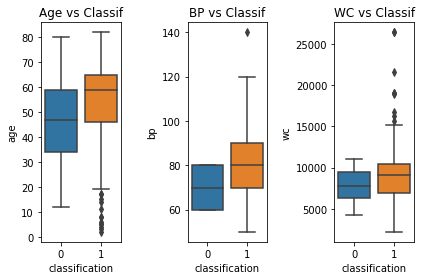

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

data1 = df_train

sns.boxplot( y=data1["age"], x = data1['classification'], ax=ax1).set_title('Age vs Classif')

sns.boxplot( y=data1["bp"], x = data1['classification'], ax=ax2).set_title('BP vs Classif')

sns.boxplot( y=data1["wc"], x = data1['classification'], ax=ax3).set_title('WC vs Classif')

plt.tight_layout()

plt.show()

In [4]:
#Pre-processing data
df_train2 = df_train.drop("Unnamed: 0", axis=1)
df_test2 = df_test.drop("Unnamed: 0", axis=1)

cols_to_norm = ['age', 'bp','bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
df_train2[cols_to_norm] = df_train2[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_test2[cols_to_norm] = df_test2[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

features = df_train2.iloc[:, 0:24].values
test_matrix = df_test2.iloc[:,0:24].values

labels = df_train2.iloc[:, 24].values

print(features.shape, labels.shape)
stats.describe(features).variance

real_test_x = df_test.values
print(real_test_x.shape)
print(labels.shape)

(300, 24) (300,)
(100, 25)
(300,)


# 1.b

The plan for the neural network is as follows:

First it will be a feed-forward sequential neural network with 6 dense hidden layers and 1 output layer. The data will be normalized and formatted first. Then it will enter the hidden layers. The hidden layers are tanh functions because tanh functions are better than sigmoid functions in terms of hidden layers. The output layer will be sigmoid because the result will be a binary value. Each layer will consist of a certain number of neurons, probably 32 based on the sample sizes. Each layer will have a L2 regularization penalty added to the loss function. Each neuron will be randomly dropped out with a probability of 0.2. The optimizer will be Adam because it is widely used and appraised these days for finding the optimum point. We will be using binary cross entropy as our loss function because our predictions are binary. The model will be undergoing mini batch training in 300 epochs.

Our labeled data set will be split into two parts: The first part is a training set, which consists of 80% of the labeled dataset. The second part is a validation set which has 20% of the dataset.

The hyperparameters to tune are: number of neurons in each hidden layer, the lambda value for L2 constraint, the neuron drop-out rate, the optimizer and number of epochs.

To avoid overfitting of our model, we will use random dropouts and L2 regularization. 

# 1.c

We have estimated the hyperparameters manually in another file. All the following hyperparameters used for our neural network are good enough. 

In [17]:
data = features
labels = labels
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=76)

In [18]:
model = Sequential()
model.add(Dense(32, activation='tanh',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='tanh',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
model.fit(X_train, y_train, epochs=300, batch_size=20)

Epoch 1/300
240/240 [==============================] - 1s 4ms/sample - loss: 2.2379 - acc: 0.5458
Epoch 2/300
240/240 [==============================] - 0s 116us/sample - loss: 1.9928 - acc: 0.8333
Epoch 3/300
240/240 [==============================] - 0s 125us/sample - loss: 1.8447 - acc: 0.9000
Epoch 4/300
240/240 [==============================] - 0s 137us/sample - loss: 1.7080 - acc: 0.9208
Epoch 5/300
240/240 [==============================] - 0s 112us/sample - loss: 1.5837 - acc: 0.9542
Epoch 6/300
240/240 [==============================] - 0s 125us/sample - loss: 1.5063 - acc: 0.9458
Epoch 7/300
240/240 [==============================] - 0s 121us/sample - loss: 1.4177 - acc: 0.9458
Epoch 8/300
240/240 [==============================] - 0s 125us/sample - loss: 1.3202 - acc: 0.9750
Epoch 9/300
240/240 [==============================] - 0s 121us/sample - loss: 1.2605 - acc: 0.9500
Epoch 10/300
240/240 [==============================] - 0s 133us/sample - loss: 1.2043 - acc: 0.9708
E

240/240 [==============================] - 0s 125us/sample - loss: 0.1841 - acc: 0.9958
Epoch 83/300
240/240 [==============================] - 0s 133us/sample - loss: 0.1770 - acc: 0.9917
Epoch 84/300
240/240 [==============================] - 0s 121us/sample - loss: 0.1751 - acc: 0.9958
Epoch 85/300
240/240 [==============================] - 0s 116us/sample - loss: 0.1784 - acc: 0.9917
Epoch 86/300
240/240 [==============================] - 0s 108us/sample - loss: 0.1917 - acc: 0.9958
Epoch 87/300
240/240 [==============================] - 0s 116us/sample - loss: 0.1911 - acc: 0.9875
Epoch 88/300
240/240 [==============================] - 0s 116us/sample - loss: 0.1808 - acc: 0.9917
Epoch 89/300
240/240 [==============================] - 0s 116us/sample - loss: 0.1863 - acc: 0.9958
Epoch 90/300
240/240 [==============================] - 0s 121us/sample - loss: 0.1761 - acc: 0.9917
Epoch 91/300
240/240 [==============================] - 0s 137us/sample - loss: 0.1791 - acc: 0.9958
Epo

240/240 [==============================] - 0s 104us/sample - loss: 0.1607 - acc: 0.9958
Epoch 163/300
240/240 [==============================] - 0s 112us/sample - loss: 0.1456 - acc: 0.9958
Epoch 164/300
240/240 [==============================] - 0s 125us/sample - loss: 0.1530 - acc: 0.9917
Epoch 165/300
240/240 [==============================] - 0s 121us/sample - loss: 0.1629 - acc: 0.9917
Epoch 166/300
240/240 [==============================] - 0s 121us/sample - loss: 0.1539 - acc: 0.9917
Epoch 167/300
240/240 [==============================] - 0s 125us/sample - loss: 0.1564 - acc: 0.9958
Epoch 168/300
240/240 [==============================] - 0s 116us/sample - loss: 0.1463 - acc: 0.9917
Epoch 169/300
240/240 [==============================] - 0s 112us/sample - loss: 0.1596 - acc: 0.9958
Epoch 170/300
240/240 [==============================] - 0s 108us/sample - loss: 0.1578 - acc: 0.9958
Epoch 171/300
240/240 [==============================] - 0s 116us/sample - loss: 0.1521 - acc: 0

240/240 [==============================] - 0s 104us/sample - loss: 0.1479 - acc: 0.9958
Epoch 243/300
240/240 [==============================] - 0s 116us/sample - loss: 0.1385 - acc: 0.9917
Epoch 244/300
240/240 [==============================] - 0s 121us/sample - loss: 0.1415 - acc: 0.9917
Epoch 245/300
240/240 [==============================] - 0s 133us/sample - loss: 0.1424 - acc: 0.9958
Epoch 246/300
240/240 [==============================] - 0s 125us/sample - loss: 0.1472 - acc: 0.9833
Epoch 247/300
240/240 [==============================] - 0s 129us/sample - loss: 0.1444 - acc: 0.9917
Epoch 248/300
240/240 [==============================] - 0s 121us/sample - loss: 0.1437 - acc: 0.9958
Epoch 249/300
240/240 [==============================] - 0s 121us/sample - loss: 0.1413 - acc: 0.9958
Epoch 250/300
240/240 [==============================] - 0s 121us/sample - loss: 0.1483 - acc: 0.9875
Epoch 251/300
240/240 [==============================] - 0s 116us/sample - loss: 0.1428 - acc: 0

# 1.d

In [19]:
ynew = model.predict_classes(X_val)
a = confusion_matrix(ynew,y_val)

print(a)
tn = a[0][0]
fn = a[1][0]
tp = a[1][1]
fp = a[0][1]

[[22  2]
 [ 0 36]]


In [20]:
print("Precision is: ", tp / (tp+fp))
print("-------------------------------------------")
print("Recall or true positive rate is ",tp / (tp + fn))
print("-------------------------------------------")
print("False positive rate is", fp / (fp + tn))

Precision is:  0.9473684210526315
-------------------------------------------
Recall or true positive rate is  1.0
-------------------------------------------
False positive rate is 0.08333333333333333


In [21]:
new_test_y = model.predict_classes(test_matrix)
df_test['classification'] = new_test_y
df_test.to_csv('F:\\SP2019\\Machine_learning\\HW3\\unlabeled_predictions.csv', sep=',', index=False)


## P2

In [2]:
import pandas as pd
data2 = pd.read_csv("F:\\SP2019\\Machine_learning\\HW3\\data.csv")
data2labels =  pd.read_csv("F:\\SP2019\\Machine_learning\\HW3\\labels.csv")

In [3]:
categories = data2labels['Class'].unique()
print(categories)

['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']


In [4]:
data21 = data2.drop("Unnamed: 0", axis=1)
data2labels = data2labels.drop("Unnamed: 0", axis=1)

In [5]:
import seaborn as sns
%matplotlib inline
from sklearn.manifold import t_sne

tsne = t_sne.TSNE(n_components=2, random_state=1)
X_2d = tsne.fit_transform(data21)

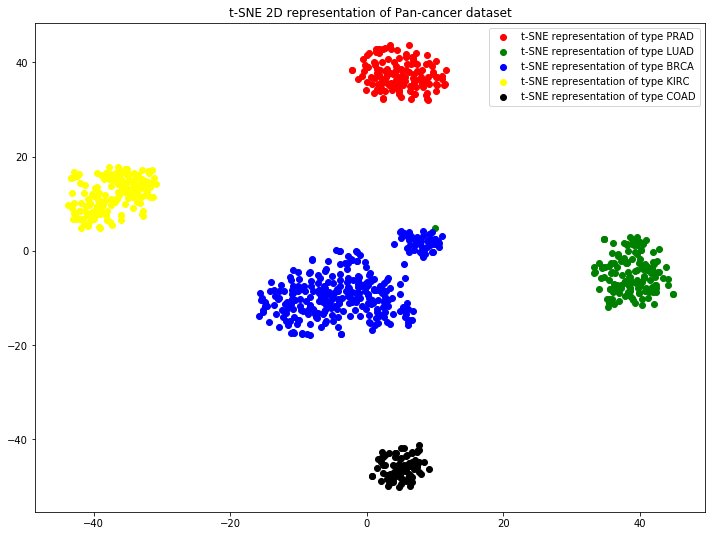

In [6]:
colors = ['red', 'green', 'blue', 'yellow', 'black']
plt.figure(figsize=(12, 9))
for i in range(len(categories)):
    for j in range(len(X_2d)):
        if data2labels['Class'][j] == categories[i]:
            plt.scatter(X_2d[j, 0], X_2d[j, 1], color=colors[i])

#This is faster loop and it is used to create legent for our graph
for i in range(len(categories)):
       for j in range(len(X_2d)):
            if data2labels['Class'][j] == categories[i]:
                plt.scatter(X_2d[j, 0], X_2d[j, 1], color=colors[i], label='t-SNE representation of type {}'.format(categories[i]))
                break
plt.legend()
plt.title("t-SNE 2D representation of Pan-cancer dataset")
plt.show()

t-SNE is in short for t distributed stochastic neighor embedding. It is a non linear dimension reduction technique that is used for visualize high dimensional datasets. In the first step, t-SNE calculates the similarity measure between pairs of data-points in the high dimensional space. In the second step, t-SNE calculates the similarity measure between pairs of data-points in the low dimensional space. In the third step, t-SNE minimizes the distance between similarity probability distributions in high and low dimensional spaces

We found that the five different types of cancer are well-separated by the t-SNE algorithm. There is only one visible outlier from the LUAD type, which was positioned by t-SNE algorithm closer to the BRCA type. The point alone is strange but maybe it is due to mislabeling. In general, we found that t-SNE is powerful in separating different types of pan cancer. 